1. load the data file train.csv into a data frame
2.build a binary classification model doing all the necessary steps we have discussed
3. output a confusion matrix

In [73]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#!pip install scikitplot
#import scikitplot as skplt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [74]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [75]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'], dtype=object)

In [76]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

In [77]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [79]:
df["workclass"].replace('', "NaN", inplace=True)
df.dropna(subset = ["workclass"], inplace=True)

df["occupation"].replace('', "NaN", inplace=True)
df.dropna(subset = ["occupation"], inplace=True)

df["native-country"].replace('', "NaN", inplace=True)
df.dropna(subset = ["native-country"], inplace=True)


In [80]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [81]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'], dtype=object)

In [82]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [83]:
sex = set(df['gender'])
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)


In [84]:
df['race'].value_counts()

White                 35007
Black                  3817
Asian-Pac-Islander     1184
Amer-Indian-Eskimo      394
Other                   325
Name: race, dtype: int64

In [85]:
race = set(df['race'])
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [ ]:
df['race'].value_counts()

In [86]:
Marital = set(df['marital-status'])
print(Marital)

{'Widowed', 'Married-spouse-absent', 'Separated', 'Married-civ-spouse', 'Never-married', 'Married-AF-spouse', 'Divorced'}


In [87]:
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)



In [88]:
emp = set(df['workclass'])
print(emp)
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

{'Self-emp-not-inc', 'Private', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'State-gov', 'Local-gov'}


In [89]:
ed = set(df['education'])
print(ed)

{'Some-college', '1st-4th', 'HS-grad', 'Preschool', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', '12th', '7th-8th', '11th', '5th-6th', '9th', 'Masters', 'Doctorate', '10th', 'Prof-school'}


In [90]:


df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [91]:
occupation = set(df['occupation'])
print(occupation)
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)


{'Sales', 'Machine-op-inspct', 'Transport-moving', 'Armed-Forces', 'Tech-support', 'Craft-repair', 'Other-service', 'Adm-clerical', 'Exec-managerial', 'Farming-fishing', 'Protective-serv', 'Prof-specialty', 'Priv-house-serv', 'Handlers-cleaners'}


In [92]:
relationship = set(df['relationship'])
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [93]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,5,366425,10,16,4,7,0,3,0,99999,0,60,United-States,1
1,17,5,244602,5,8,5,13,5,3,0,0,0,15,United-States,0
2,31,5,174201,12,13,2,7,4,3,0,0,0,40,United-States,1
3,58,1,110199,6,4,2,11,4,3,0,0,0,40,United-States,0
4,25,1,149248,0,10,5,13,0,0,0,0,0,40,United-States,0
5,59,1,105363,3,9,5,3,5,3,0,0,0,40,United-States,0
6,70,5,216390,15,5,2,6,1,3,1,2653,0,40,United-States,0
7,35,6,361888,12,13,2,10,4,3,0,0,0,60,Japan,0
8,28,5,74784,3,9,5,4,0,3,0,0,0,50,United-States,0
9,28,5,118089,3,9,2,7,4,3,0,4386,0,45,United-States,1


In [94]:
df.drop(['fnlwgt','capital-gain','relationship'],axis=1, inplace=True)

In [95]:
df1 = pd.get_dummies(df, columns=['native-country'])



In [96]:
df1.sample(10)

,age,workclass,education,educational-num,marital-status,occupation,race,gender,capital-loss,hours-per-week,income_>50K,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
799,45,6,0,10,2,13,3,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27339,50,5,3,9,2,2,3,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16150,33,5,0,10,5,10,3,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12478,33,5,0,10,5,7,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43113,25,5,0,10,5,13,3,1,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32446,37,1,14,11,5,5,3,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28826,41,5,0,10,2,9,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16648,28,5,3,9,4,4,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16183,35,5,0,10,3,11,0,1,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14311,33,5,12,13,2,5,3,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
df1.dtypes

age                                          int64
workclass                                    int64
education                                    int64
educational-num                              int64
marital-status                               int64
occupation                                   int64
race                                         int64
gender                                       int64
capital-loss                                 int64
hours-per-week                               int64
income_>50K                                  int64
native-country_Cambodia                      uint8
native-country_Canada                        uint8
native-country_China                         uint8
native-country_Columbia                      uint8
native-country_Cuba                          uint8
native-country_Dominican-Republic            uint8
native-country_Ecuador                       uint8
native-country_El-Salvador                   uint8
native-country_England         

In [30]:
train_col = df1.columns[df1.columns != 'income_>50K']

traget_columns = df.columns[df.columns == 'income_>50K']

In [97]:

X_train, X_test, y_train, y_test = train_test_split(df1[train_col], df1[traget_columns], test_size = 0.30, random_state = 0)


In [34]:

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = scaler.transform(X_test)

In [46]:
X.shape

(28508, 51)

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


def build_model():  
    model = models.Sequential()
    model.add(layers.Dense(51, activation=layers.LeakyReLU(), input_shape=(X.shape[1],)))
    model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(137, activation=layers.LeakyReLU()))
    model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(137, activation=layers.LeakyReLU()))
    model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(137, activation=layers.LeakyReLU()))
    model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(137, activation=layers.LeakyReLU()))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.metrics.Recall(), 'accuracy'])      
    return model
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 51)                2652      
                                                                 
 dropout_24 (Dropout)        (None, 51)                0         
                                                                 
 dense_37 (Dense)            (None, 137)               7124      
                                                                 
 dropout_25 (Dropout)        (None, 137)               0         
                                                                 
 dense_38 (Dense)            (None, 137)               18906     
                                                                 
 dropout_26 (Dropout)        (None, 137)               0         
                                                                 
 dense_39 (Dense)            (None, 137)              

In [52]:
model = KerasClassifier(build_fn=build_model, epochs=100, batch_size=32, verbose=1)
callbacks = [EarlyStopping(monitor='loss', patience=1,restore_best_weights=True)]
modelfit = model.fit(X_train, y_train, callbacks=callbacks, validation_split=.15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/100
758/758 [==============================] - 6s 6ms/step - loss: 1.2001 - recall_4: 0.1097 - accuracy: 0.7239 - val_loss: 0.6178 - val_recall_4: 0.0971 - val_accuracy: 0.7473
Epoch 2/100
758/758 [==============================] - 3s 5ms/step - loss: 0.5912 - recall_4: 0.0927 - accuracy: 0.7555 - val_loss: 0.4433 - val_recall_4: 0.2253 - val_accuracy: 0.7760
Epoch 3/100
758/758 [==============================] - 4s 5ms/step - loss: 0.4638 - recall_4: 0.3004 - accuracy: 0.7767 - val_loss: 0.4255 - val_recall_4: 0.6969 - val_accuracy: 0.7821
Epoch 4/100
758/758 [==============================] - 3s 4ms/step - loss: 0.4335 - recall_4: 0.3872 - accuracy: 0.7871 - val_loss: 0.4141 - val_recall_4: 0.6236 - val_accuracy: 0.7921
Epoch 5/100
758/758 [==============================] - 4s 5ms/step - loss: 0.4213 - recall_4: 0.4021 - accuracy: 0.7904 - val_loss: 0.4175 - val_recall_4: 0.3718 - val_accuracy: 0.7905
Epoch 6/100
758/758 [==============================] - 4s 6ms/step - loss: 

In [53]:
predictions = model.predict(X_test)
predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

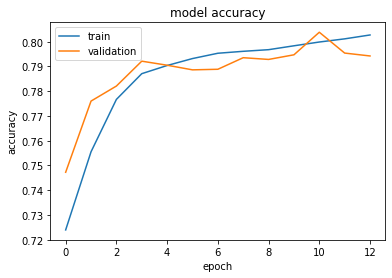

In [56]:
plt.plot(modelfit.history['accuracy'])
plt.plot(modelfit.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='upper left') 
plt.show()   

prediction [0]
prediction_prob [0.9909529  0.00904709]
382/382 [==============================] - 2s 5ms/step - loss: 0.6726 - recall_4: 0.1582 - accuracy: 0.7734
0.7733857035636902


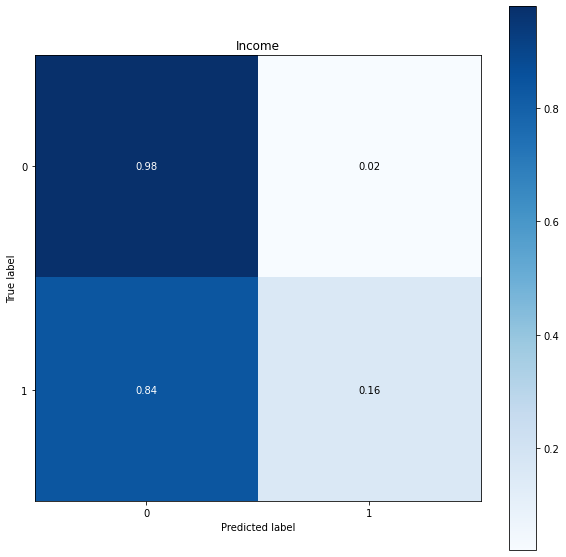

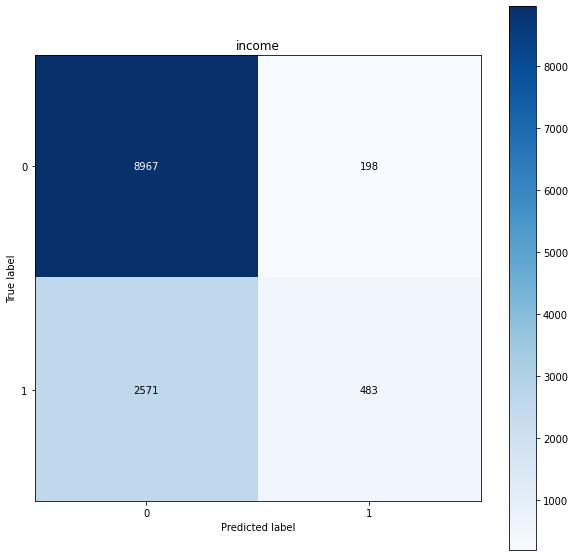

0.7733857107782961
0.7432110940825298
0.568274656831694
0.5624429030423971


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


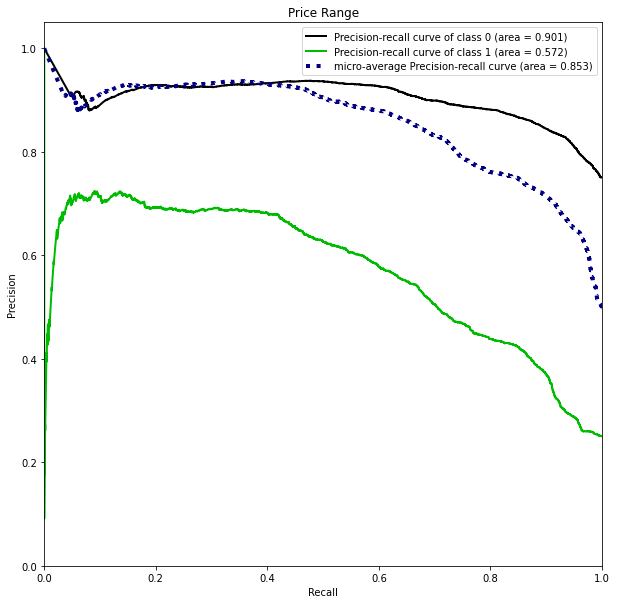

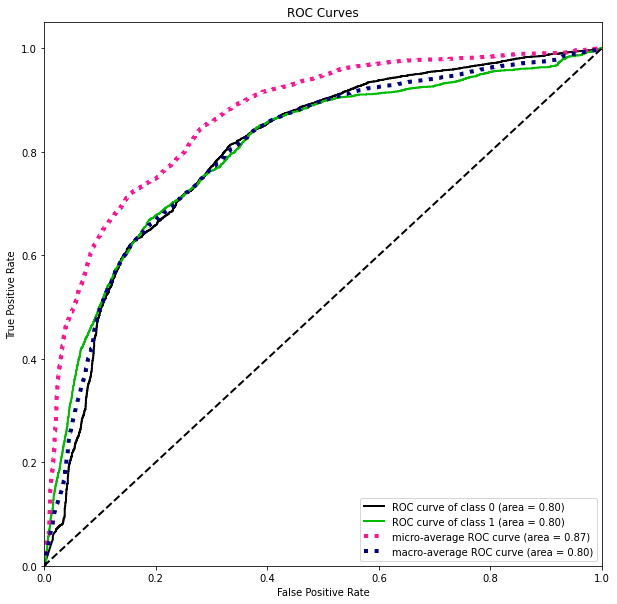

In [61]:

!pip install scikit-plot

plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(y)
print("prediction", pre[0])
predictions = model.predict_proba(y)
print("prediction_prob", predictions[0])
print(model.score(y, y_test))
            
skplt.metrics.plot_confusion_matrix(y_test, pre, normalize=True,title='Income')
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, pre, normalize=False,title='income')
plt.show()
#skplt.metrics.plot_roc(y_test, predictions)
#plt.show()

print(accuracy_score(y_test, pre))
print(precision_score(y_test, pre, average='macro'))
print(recall_score(y_test, pre,average='macro'))
print(f1_score(y_test, pre,average='macro'))

skplt.metrics.plot_precision_recall_curve(y_test,  predictions,title='Price Range')

skplt.metrics.plot_roc(y_test,predictions)
plt.show()